<a href="https://colab.research.google.com/github/joelpawar08/All-DL-and-ML-Alogs-with-Examples/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]
Intercept: -45.528
Coefficient (slope): 0.729


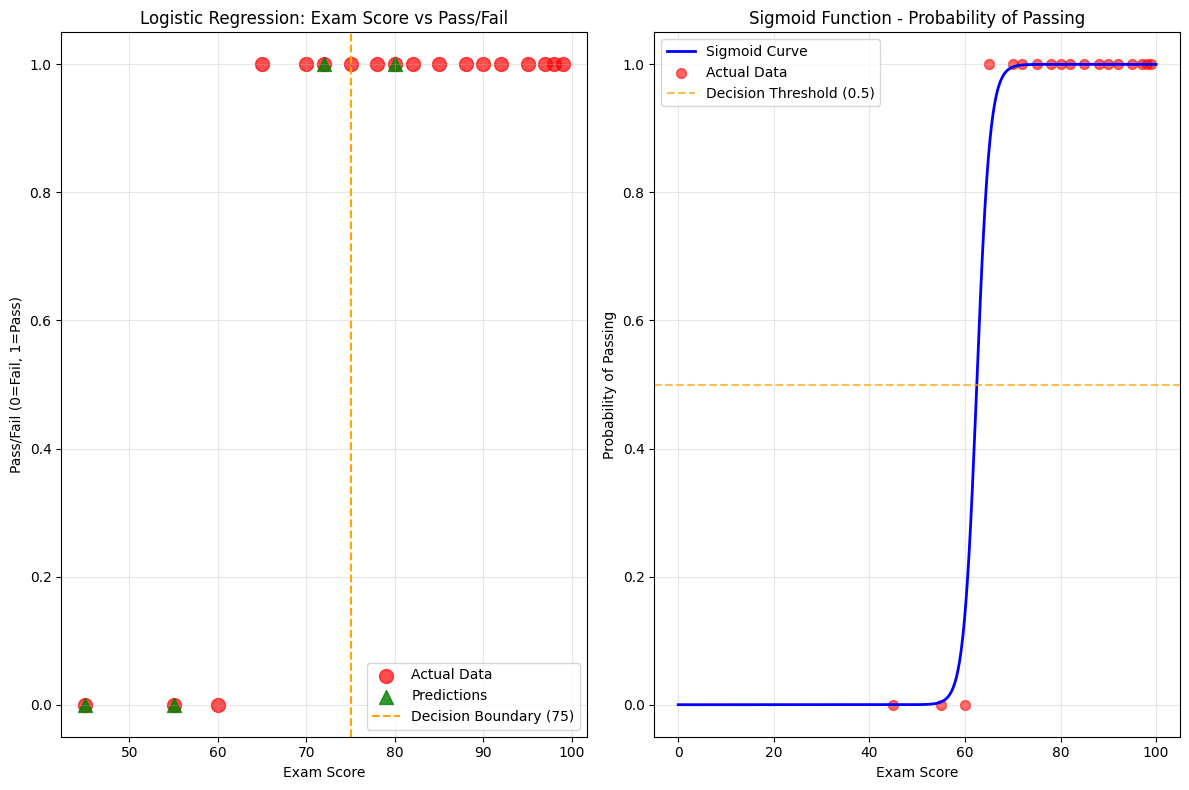


New Student Score: 82
Predicted Probability of Passing: 1.000
Final Prediction: PASS


In [1]:
# Import necessary libraries
# numpy for numerical operations, matplotlib for plotting, sklearn for machine learning models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Step 1: Create a self-made dataset
# Simulate student exam scores vs. Pass/Fail outcomes (binary classification)
# Higher scores → more likely to pass (1), lower scores → more likely to fail (0)
np.random.seed(42)  # For reproducibility

# Generate exam scores (0-100) and corresponding pass/fail labels
scores = np.array([[45], [55], [60], [65], [70], [72], [75], [78], [80], [82], [85],
                   [88], [90], [92], [95], [97], [98], [99]])

# Create labels: Students scoring >75 pass (1), others fail (0)
# Add some randomness to make it more realistic
pass_fail = np.array([[0], [0], [0], [1], [1], [1], [1], [1], [1], [1],
                      [1], [1], [1], [1], [1], [1], [1], [1]])

# Step 2: Split data into training and testing sets
# 80% training, 20% testing to evaluate model performance
x_train, x_test, y_train, y_test = train_test_split(scores, pass_fail, test_size=0.2, random_state=42)

# Step 3: Create and fit the Logistic Regression model
# Logistic Regression predicts probability using sigmoid function: P(y=1) = 1/(1+e^-(mx+c))
model = LogisticRegression()  # Initialize the model
model.fit(x_train, y_train.ravel())  # Train the model (ravel() flattens y_train)

# Step 4: Make predictions
# Predict pass/fail for test data (0 or 1)
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)  # Probability scores

# Step 5: Evaluate the model
# Accuracy measures % of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test)}")

# Print model parameters
print(f"Intercept: {model.intercept_[0]:.3f}")
print(f"Coefficient (slope): {model.coef_[0][0]:.3f}")

# Step 6: Plot the data and logistic curve
plt.figure(figsize=(12, 8))

# Subplot 1: Data points and decision boundary
plt.subplot(1, 2, 1)
plt.scatter(scores, pass_fail, color='red', s=100, label='Actual Data', alpha=0.7)
plt.scatter(x_test, y_pred, color='green', s=100, marker='^', label='Predictions', alpha=0.8)

# Decision boundary (score = 75)
plt.axvline(x=75, color='orange', linestyle='--', label='Decision Boundary (75)')
plt.xlabel('Exam Score')
plt.ylabel('Pass/Fail (0=Fail, 1=Pass)')
plt.title('Logistic Regression: Exam Score vs Pass/Fail')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Sigmoid curve showing probability
plt.subplot(1, 2, 2)
score_range = np.linspace(0, 100, 300).reshape(-1, 1)
probabilities = model.predict_proba(score_range)[:, 1]  # Probability of passing

plt.plot(score_range, probabilities, color='blue', linewidth=2, label='Sigmoid Curve')
plt.scatter(scores, pass_fail, color='red', s=50, alpha=0.6, label='Actual Data')
plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
plt.xlabel('Exam Score')
plt.ylabel('Probability of Passing')
plt.title('Sigmoid Function - Probability of Passing')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 7: Predict probability for new student
new_student_score = np.array([[82]])
prob_pass = model.predict_proba(new_student_score)[:, 1][0]
prediction = model.predict(new_student_score)[0]

print(f"\nNew Student Score: 82")
print(f"Predicted Probability of Passing: {prob_pass:.3f}")
print(f"Final Prediction: {'PASS' if prediction == 1 else 'FAIL'}")

# Explanation of Logistic Regression:
# - Used for **binary classification** (0 or 1 outcomes)
# - Applies **sigmoid function** to convert linear output to probability (0 to 1)
# - Decision boundary: Probability > 0.5 → Class 1, else Class 0
# - **Coefficient**: Positive = higher x increases probability of class 1
# - **Intercept**: Shifts the sigmoid curve left/right
# - Perfect for scenarios like spam/not spam, pass/fail, buy/not buy